In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np 
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error, max_error, r2_score
import matplotlib.pyplot as plt
from PIL import Image as im
%matplotlib inline

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
data = pd.read_csv('/kaggle/input/digit-recognizer/train.csv').to_numpy()
example_sub = pd.read_csv('/kaggle/input/digit-recognizer/sample_submission.csv').to_numpy()
test_data = pd.read_csv('/kaggle/input/digit-recognizer/test.csv').to_numpy()
    
Y = data[:,0] # this is the actual digit drawn by the user
X = data[:,1:] # these are the pixel representations: columns 1-784 for a digit in Y. Value => Darkness

print(len(Y))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv
42000


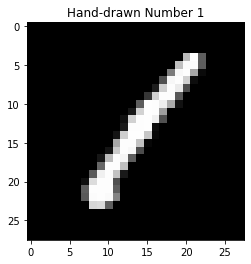

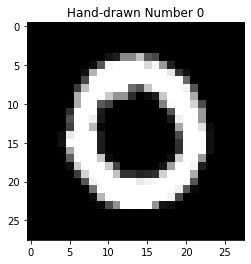

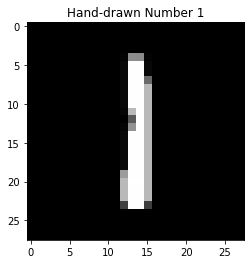

In [2]:
plt.figure(figsize = (10,4))
for i in range(3):
    target = Y[i]
    image_row = X[i]
    plt.imshow(np.reshape(image_row, (28,28)), cmap = 'gray')
    plt.title("Hand-drawn Number %d" % target)
    plt.show()

This problem is a classification problem, as the target variable (classification as a digit 0-9) is a non-continuous value. It is an example of multi-class classification. Four classification models will be evaluated below. 

In [3]:
X_train, X_valid, Y_train, Y_valid = train_test_split(X, Y, test_size = 0.2)

from sklearn.linear_model import SGDClassifier
from xgboost.sklearn import XGBClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
    

def class_model (model_name, model_initiation):
      model = model_initiation
      model.fit(X_train, Y_train)
      preds = model.predict(X_valid)
      acc_score = accuracy_score (Y_valid, preds) 
      print (model_name + " Accuracy Score:" + str(acc_score))

In [4]:
#class_model("XGBClass", XGBClassifier())

In [5]:
#class_model("SGDClass", SGDClassifier())

In [6]:
#class_model ("KNeighbours", KNeighborsClassifier())

In [7]:
class_model ("RandomForestClassifer", RandomForestClassifier())

RandomForestClassifer Accuracy Score:0.9639285714285715


In [8]:
prediction_model = RandomForestClassifier()
prediction_model.fit(X,Y)
preds = prediction_model.predict(test_data)


In [9]:
print(len(test_data))
from pandas import Series

col1 = Series(np.arange(len(test_data)))
col2 = preds
combined_array=np.column_stack((col1,col2))
df = pd.DataFrame(combined_array)
df.to_csv('submission.csv', index=False)




28000


KNeighbours has the best accuracy score, which is unsuprising given its proficiency for thes types of problems. 